#**Day 3 with Python** 
Support Vector Regression

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import pandas
import numpy as np

data = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Day3/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


**Hyperparameter**:
- **Kernel**: A kernel helps us find a hyperplane in the higher dimensional space without increasing the computational cost
- **Hyperplane**: This is basically a separating line between two data classes in SVM. But in Support Vector Regression, this is the line that will be used to predict the continuous output
- **Decision Boundary**: A decision boundary can be thought of as a demarcation line (for simplification) on one side of which lie positive examples and on the other side lie the negative examples. On this very line, the examples may be classified as either positive or negative. This same concept of SVM will be applied in Support Vector Regression as well

In [97]:
X = data.iloc[:,1].values.reshape(-1,1)
Y = data.iloc[:,2].values.reshape(-1,1)

Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

Có thể tạo 1 hàm tính gtri mang X nay ko

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
Y = sc.fit_transform(Y)
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [99]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [107]:
X_pred = [(X[6]+X[7])/2]
y_pred = regressor.predict(np.array(X_pred).reshape(-1, 1))

y_sal = sc.inverse_transform([y_pred])

y_sal

array([[263740.85328003]])

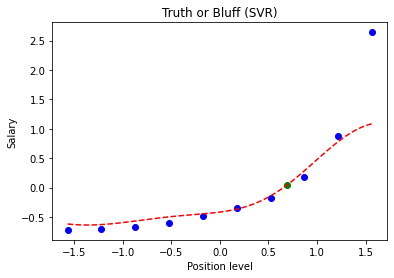

In [119]:
import matplotlib.pyplot as plt

X_grid = np.arange(min(X), max(X), 0.001) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'blue')
plt.scatter(X_pred, y_pred, color = 'green')
plt.plot(X_grid, regressor.predict(X_grid),'--', color = 'red' )
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()